# Explore the Electric Vehicles Sales Data

In [1]:
# Import Functions
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set your custom color palette

colors = ["#FF0B04", "#4374B3"]
cust_colors = sns.set_palette(sns.color_palette(colors))
#sns.set_palette(sns.color_palette(colors))
red = "#FF0B04"
blue = "#4374B3"
combined = "#782F98"

## Load and Review the Electric Vehicles Data

In [3]:
# Create data frames for all records
ev_df = pd.read_csv('Electric_Vehicle_Sales_Data.csv')

print('1st 10 Rows of EV Sales Data')
ev_df.head(10)

1st 10 Rows of EV Sales Data


,vin,county,city,state,zipcode,year,make,model,ev_type,cafv_eligibility,electric_range,base_msrp,legislative_district
0,WBY8P6C58K,King,Seattle,WA,98115,2019,BMW,I3,BEV,CAFV Elegible,153,0,43
1,5YJSA1E26J,King,Kent,WA,98042,2018,TESLA,MODEL S,BEV,CAFV Elegible,249,0,47
2,5YJXCDE23J,King,Bellevue,WA,98004,2018,TESLA,MODEL X,BEV,CAFV Elegible,238,0,41
3,WBY33AW0XP,King,Seattle,WA,98109,2023,BMW,I4,BEV,Unknown/Not Researched,0,0,36
4,5YJ3E1EB5L,King,Bothell,WA,98011,2020,TESLA,MODEL 3,BEV,CAFV Elegible,322,0,1
5,1V2GNPE86P,King,Sammamish,WA,98075,2023,VOLKSWAGEN,ID.4,BEV,Unknown/Not Researched,0,0,41
6,5YJ3E1EB0M,Yakima,Yakima,WA,98908,2021,TESLA,MODEL 3,BEV,Unknown/Not Researched,0,0,14
7,1N4BZ1CP3K,Kitsap,Bainbridge Island,WA,98110,2019,NISSAN,LEAF,BEV,CAFV Elegible,150,0,23
8,5YJSA1E29J,Kitsap,Poulsbo,WA,98370,2018,TESLA,MODEL S,BEV,CAFV Elegible,249,0,23
9,KNDCC3LGXK,King,Kirkland,WA,98033,2019,KIA,NIRO,BEV,CAFV Elegible,239,0,45


In [4]:
# Datatypes
print('Checking Datatypes')

ev_df.info()

Checking Datatypes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157240 entries, 0 to 157239
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   vin                   157240 non-null  object
 1   county                157240 non-null  object
 2   city                  157240 non-null  object
 3   state                 157240 non-null  object
 4   zipcode               157240 non-null  int64 
 5   year                  157240 non-null  int64 
 6   make                  157240 non-null  object
 7   model                 157240 non-null  object
 8   ev_type               157240 non-null  object
 9   cafv_eligibility      157240 non-null  object
 10  electric_range        157240 non-null  int64 
 11  base_msrp             157240 non-null  int64 
 12  legislative_district  157240 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 15.6+ MB


In [5]:
# Number Rows and Columns

ev_df.shape

(157240, 13)

In [6]:
# Looking for Nulls
print('Looking for Columns with NULLS')

print(ev_df.isnull().sum())

Looking for Columns with NULLS
vin                     0
county                  0
city                    0
state                   0
zipcode                 0
year                    0
make                    0
model                   0
ev_type                 0
cafv_eligibility        0
electric_range          0
base_msrp               0
legislative_district    0
dtype: int64


## Sales Counts

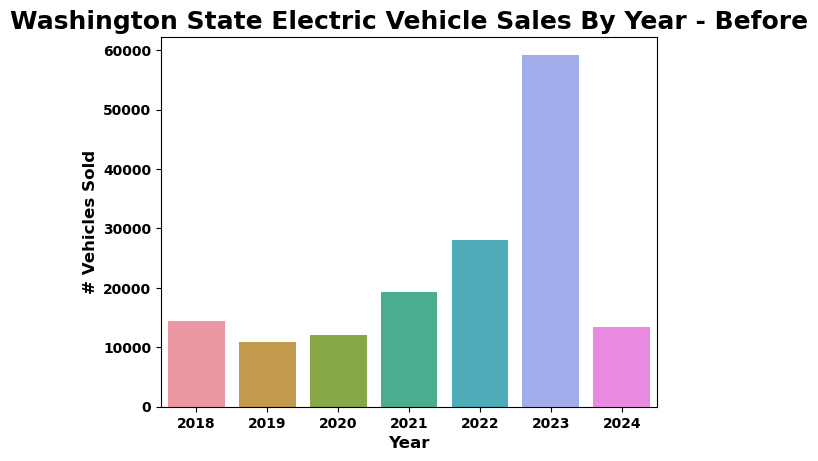

In [7]:
# Counts by year

ev_cp = sns.countplot(data = ev_df, x = 'year')

ev_cp.set_title('Washington State Electric Vehicle Sales By Year - Before', 
                      fontdict={'size': 18, 'weight': 'bold', 'color': 'black'})
ev_cp.set_xlabel('Year', fontdict={'size': 12, 'weight': 'bold'})
ev_cp.set_ylabel('# Vehicles Sold', fontdict={'size': 12, 'weight': 'bold'})

#Set x-axis labels bold
plt.xticks(weight = 'bold')

#Set y-axis labels and set to bold
plt.yticks(weight = 'bold')

# Show the plot
plt.show()


In [8]:
# Counts by city and zipcode
print('\nTop 5 Cities by Zipcode Count')

city_cnts = ev_df.groupby('city')['zipcode'].nunique()
city_cnts_df = city_cnts.to_frame()
city_cnts_df = city_cnts_df.sort_values('zipcode',ascending = False)

city_cnts_df.head(5)


Top 5 Cities by Zipcode Count


,zipcode
city,
Seattle,35
Tacoma,23
Spokane,20
Vancouver,11
Renton,9


In [9]:
# Counts by make 
print('\nTop 5 Sales by Brand Count')

ev_df[['make']].groupby(['make'])['make'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(5)


Top 5 Sales by Brand Count


,make,count
33,TESLA,77307
5,CHEVROLET,8404
17,KIA,7282
10,FORD,6670
26,NISSAN,6627


In [10]:
# Discard years 2018 and2024
ev_df1 = ev_df[(ev_df['year']>2018)&(ev_df['year']<2024)]

ev_df1.shape

(129445, 13)

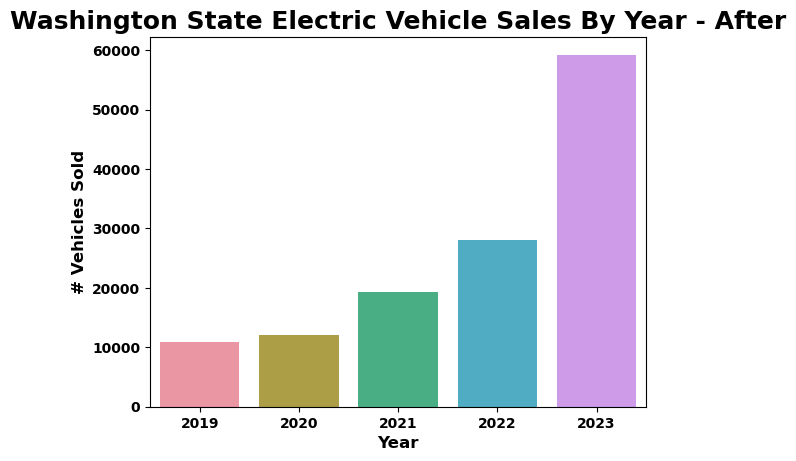

In [11]:
# Counts by year after year removal

ev_cp1 = sns.countplot(data = ev_df1, x = 'year')

ev_cp1.set_title('Washington State Electric Vehicle Sales By Year - After', 
                      fontdict={'size': 18, 'weight': 'bold', 'color': 'black'})
ev_cp1.set_xlabel('Year', fontdict={'size': 12, 'weight': 'bold'})
ev_cp1.set_ylabel('# Vehicles Sold', fontdict={'size': 12, 'weight': 'bold'})

#Set x-axis labels bold
plt.xticks(weight = 'bold')

#Set y-axis labels and set to bold
plt.yticks(weight = 'bold')

# Show the plot
plt.show()

In [12]:
print('The End')

The End
